<a href="https://colab.research.google.com/github/hsargoli/Mythesis-detect-type-of-DullDrillingBit/blob/master/first_step_in_deep_learning_(thesis)_make_Conv%26Sequ_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall -y tensorflow
!pip uninstall -y keras
!pip uninstall -y tensorflow-gpu==1.14.0


Uninstalling Keras-2.1.3:
  Successfully uninstalled Keras-2.1.3
Uninstalling tensorflow-gpu-1.14.0:
  Successfully uninstalled tensorflow-gpu-1.14.0


In [ ]:
!pip3 install --upgrade --ignore-installed tensorflow-gpu

In [ ]:
!pip install tensorflow==1.4.1

In [ ]:
!pip install tensorflow-gpu==1.14.0 

In [ ]:
!pip install keras==2.1.4

In [ ]:
!pip install mrcnn
!pip install tensorflow-gpu==1.14.0  # for use GPU
#!pip install tensorflow==1.4.1
#!pip install tensorflow==2.2.0
#!pip install tensorflow
#!pip install tensorflow==1.14.0

#!pip install tensorflow==1.3

#!pip install keras==2.1.4
#!pip install keras==2.2
!pip install keras==2.1.3


#!pip install keras==2.2
#!pip install keras==2.1.5
#!pip install keras==2.1.3


In [ ]:
!rm /usr/local/lib/python3.6/dist-packages/mrcnn/model.py

In [ ]:
import mrcnn
mrcnn.**?

# `read dataset for detection`

In [ ]:
 # fit a mask rcnn on the kangaroo dataset
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import numpy as np
import os
os.chdir('/content/drive/My Drive/TH/DS1/')
print('current directory is :' , os.getcwd())
#=========================================================
# class that defines and loads the dataset
#=========================================================
 
class cutterDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("cutter", 1, "cutter")
        # define data locations
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annots/'
        # find all images
        for filename in listdir(images_dir):
            # extract image id
            image_id = filename[:-4]
            # skip bad images
            if image_id in ['00090']:
                continue
            # skip all images after 150 if we are building the train set
            if is_train and int(image_id) >= 400:
                continue
            # skip all images before 150 if we are building the test/val set
            if not is_train and int(image_id) < 400:
                continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('cutter', image_id=image_id, path=img_path, annotation=ann_path)
        
 
    # extract bounding boxes from an annotation file
    def extract_boxes(self, image_id):
        # load and parse the file
        tree = ElementTree.parse(image_id)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax,name]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height
 
 
 



    def load_mask(self, image_id):
          # get details of image
          info = self.image_info[image_id]
          # define box file location
          class_ids = list()
          path = info['annotation']
          # load XML
          boxes, w, h = self.extract_boxes(path)
          # create one array for all masks, each on a different channel
          masks = zeros([h, w, len(boxes)], dtype='uint8')
          # create masks
          for i in range(len(boxes)):
                box = boxes[i]
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('cutter')) 
          return masks, asarray(class_ids, dtype='int32')

    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']
#--------                     -------------------                     -----------
#--------                     -------------------                     -----------
#--------                     -------------------                     -----------
# fit a mask rcnn on the kangaroo dataset
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import numpy as np
import os
print('current directory is :' , os.getcwd())
#=========================================================
# class that defines and loads the dataset
#=========================================================
from mrcnn import visualize
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# evaluate the mask rcnn model on the kangaroo dataset
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
#=========================================================
#=========================================================
# define a configuration for the model
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "cutter_cfg"
    # number of classes (background + kangaroo)
    NUM_CLASSES = 1 + 1
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
# evaluate the mask rcnn model on the kangaroo dataset
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
 
 
# load the train dataset
train_set = cutterDataset()
train_set.load_dataset('./', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# load the test dataset
test_set = cutterDataset()
test_set.load_dataset('./', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
path_weights='/content/drive/My Drive/TH/DS1/'+'cutter_cfg20201022T1442/mask_rcnn_cutter_cfg_0002.h5'
model.load_weights(path_weights, by_name=True)
# evaluate model on training dataset
#   train_mAP = evaluate_model(train_set, model, cfg)
#print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
#test_mAP = evaluate_model(test_set, model, cfg)
#print("Test mAP: %.3f" % test_mAP)

current directory is : /content/drive/My Drive/TH/DS1
current directory is : /content/drive/My Drive/TH/DS1
Train: 30
Test: 0
Re-starting from epoch 2



#  ` crop `



In [ ]:
import cv2
from mrcnn import visualize
path_img='/content/drive/My Drive/TH/tes2.jpg'
test=cv2.imread(path_img)

res=model.detect([test],verbose=1)
r = res[0]
visualize.display_instances(test, r['rois'], r['masks'], r['class_ids'], 
                            train_set.class_names, r['scores'], 
                            title="Predictions")

Processing 1 images
image


AttributeError: ignored

In [ ]:
class vis_sg:
  def __init__(self):
    pass
  def show(self,img,result):
    import random
    masks=result[0]['masks']
    score=result[0]['scores']
    ho,wo,mask_channel=masks.shape
    for i in np.arange(0,mask_channel-1):
      instance=masks[:,:,i]
      n1y=np.where(np.any(instance==True,axis=1))
      n1x=np.where(np.any(instance==True,axis=0))
      xmin,xmax,ymin,ymax=n1x[0][0],n1x[0][-1],n1y[0][0],n1y[0][-1]
      c1,c2,c3=random.randint(0,10),random.randint(0,255),random.randint(220,255)
      image=cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color=(c1,c2,c3),thickness=10)
    return image
import matplotlib.pyplot as plt
x=vis_sg()
img=x.show(test,res)
plt.imshow(img)

NameError: ignored

In [ ]:
#res=model.detect([image],verbose=1)
import matplotlib.pyplot as plt
# ===================================
# crop instances
# ----------------------------------
k1=res
k2=test
masks=k1[0]['masks']     #k1-------
score=res[0]['scores']                                               
ho,wo,mask_channel=masks.shape
if mask_channel > 1:
  print('number of instances {}'.format(mask_channel))
  wich=int(input('wich one to consider: type int from 1 to {}   '.format(mask_channel)))
  wich-=1
  print(' for this instance find %s similarity to the cutter '%(score[wich]))

else:
  print('find one instance')
  wich=0
  print(' for this instance find %s similarity to the cutter '%(score[wich]))


instance=masks[:,:,wich]
n1y=np.where(np.any(instance==True,axis=1))
n1x=np.where(np.any(instance==True,axis=0)).

xmin,xmax,ymin,ymax=n1x[0][0],n1x[0][-1],n1y[0][0],n1y[0][-1]
cutter1=k2[ymin-20:ymax+20,xmin-20:xmax+20]            #k2------
plt.imshow(cutter1)
width=float(xmax-xmin)
height=(ymax-ymin)

NameError: ignored

>>> : source cutter >>>>    name 18     > image ID  (18)  >   image_reference .//images/18.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


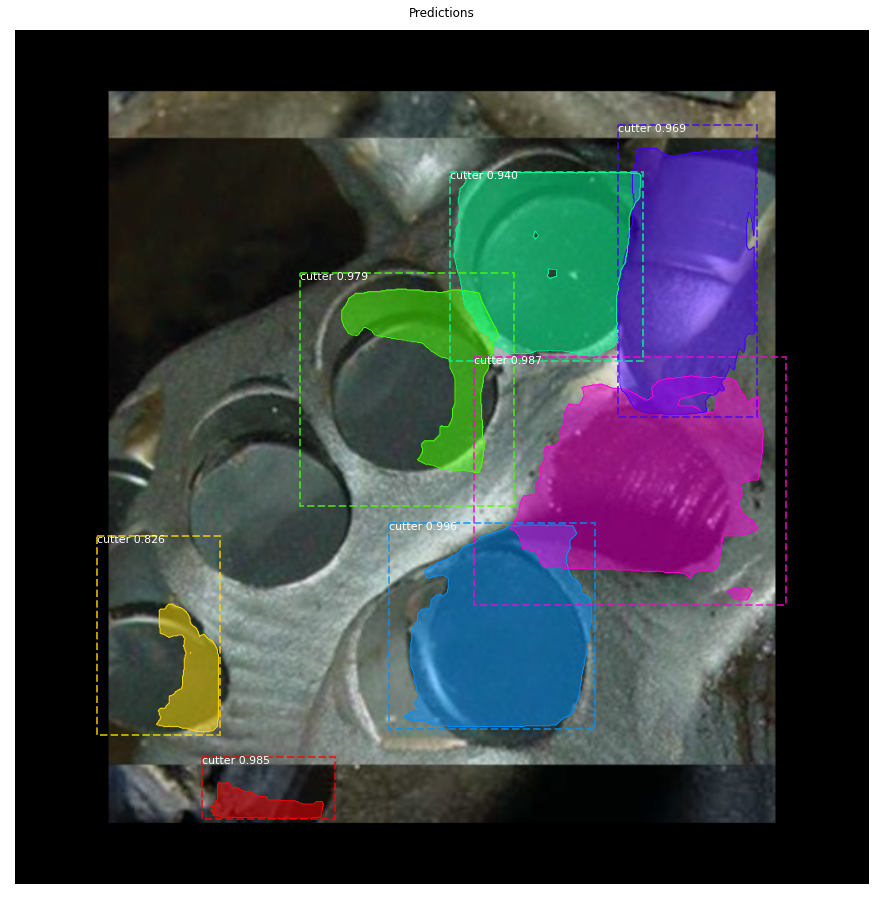

In [ ]:
# ===================================
# find  instance 
# -----------------------------------
idd=18
image, image_meta, gt_class_id, gt_bbox, gt_mask =load_image_gt(train_set, cfg, idd, use_mini_mask=False)
info = train_set.image_info[idd]
print(">>> : source {} >>>>    name {}     > image ID  ({})  >   image_reference {}".format(info["source"], info["id"], idd,train_set.image_reference(idd)))
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            train_set.class_names, r['scores'], 
                            title="Predictions")


# classification
```


In [ ]:
#from tensorflow import keras
import tensorflow.python.keras as keras
#import keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import seaborn as sns
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
#from tensorflow.python.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.utils import np_utils
import datetime
import tensorflow as tf

from tensorflow.python.keras.utils import plot_model
import tensorflow as tf

In [ ]:
plot_model?

In [ ]:
b='/content/drive/My Drive/TH/DATASET/B*.jpg' #-------------------------------------------------
ch='/content/drive/My Drive/TH/DATASET/CH*.jpg' #----------------------PATH-----------------------
w='/content/drive/My Drive/TH/DATASET/W*.jpg' #------------------------------------------------- 
data_b=[]
data_ch=[]
data_w=[]
for i in glob.glob(b,recursive=True):
    data_b.append(cv2.imread(i,0))
for i in glob.glob(ch,recursive=True):
    data_ch.append(cv2.imread(i,0))
for i in glob.glob(w,recursive=True):
    data_w.append(cv2.imread(i,0))

In [ ]:


# read data 

###------------------------------------------
worn=np.array(data_w)
chipped=np.array(data_ch)
broken=np.array(data_b)
y_worn=np.ones(len(worn))          #worn ==1    chipped==2  broken==0
y_ch=np.ones(len(chipped))*2
y_b=np.ones(len(broken))*0
# concataned ALL images
alll=np.concatenate((worn,chipped,broken),axis=0)
print('len worn:',len(worn),'len broken:',len(broken),'len ch:',len(chipped))


len worn: 313 len broken: 182 len ch: 242


In [ ]:
y_all=np.concatenate((y_worn,y_ch,y_b),axis=0)
xxf,xtf,yyf,ytf=train_test_split(alll,
                                y_all,
                                test_size=.03,
                                random_state=3)

print(xxf.shape)
print(xtf.shape)


(714, 150, 150)
(23, 150, 150)


In [ ]:


x_train=xxf.reshape(714,150,150,1)
x_test=xtf.reshape(23,150,150,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(yyf)
y_test=np_utils.to_categorical(ytf)


# `model 1`


---





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 128 6400        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 64) 73792       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 150, 150, 32) 18464       conv2d_1

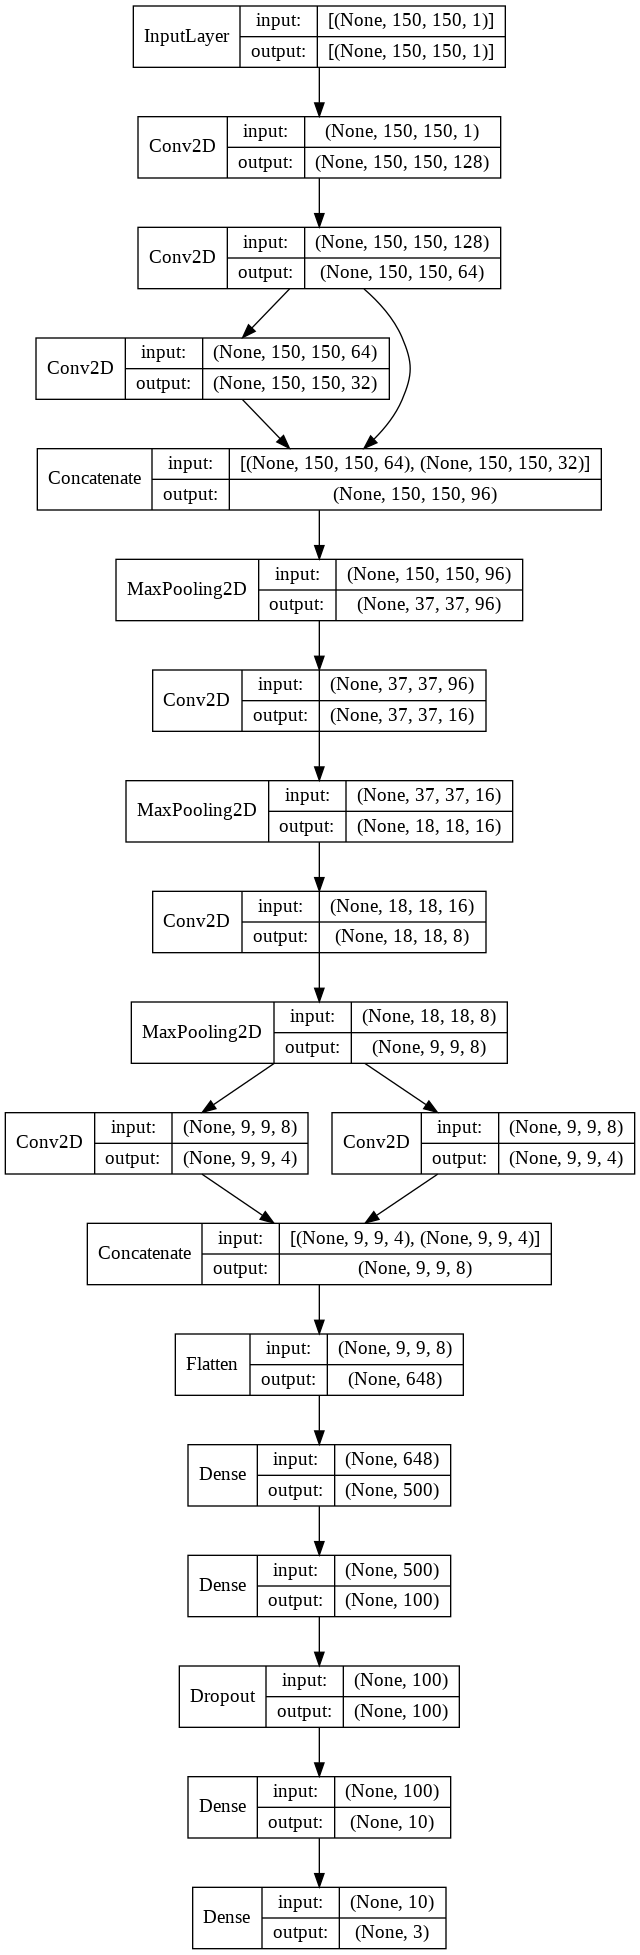

In [ ]:
#----------------------------------
#     conv    MODEL
#----------------------------------
myimput=layers.Input((150,150,1))
x1=layers.Conv2D(128,7,activation='relu',padding='SAME')(myimput)
x=layers.Conv2D(64,3,activation='relu',padding='SAME')(x1)
xx=layers.Conv2D(32,3,activation='relu',padding='SAME')(x)
concat1=layers.concatenate(inputs=[x,xx])

x2=layers.MaxPooling2D(pool_size=4)(concat1)

x4=layers.Conv2D(16,3,activation='relu',padding='SAME')(x2)
x44=layers.MaxPooling2D(pool_size=2)(x4)

x5=layers.Conv2D(8,3,activation='relu',padding='SAME')(x44)

pool2=layers.MaxPooling2D(pool_size=2)(x5)

batch_cocat=layers.Conv2D(4,3,activation='relu',padding='SAME')(pool2)
batch_normal=layers.Conv2D(4,3,activation='relu',padding='SAME')(pool2)
concat=layers.concatenate(inputs=[batch_cocat,batch_normal])

flat=layers.Flatten()(concat)
xx=layers.Dense(500,activation='relu')(flat)
xx=layers.Dense(100,activation='relu')(xx)
xx=layers.Dropout(0.5)(xx)
xx=layers.Dense(10,activation='relu')(xx)
out=layers.Dense(3,activation='softmax')(xx)
conv_model=models.Model(myimput,out)

#----------------------------------
# PLOT    MODEL
#----------------------------------
conv_model.summary()
plot_model(conv_model,show_shapes=True,show_layer_names=False,to_file='/content/drive/My Drive/TH/model.png')
#conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import backend as K
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#plot_model(conv_model,show_shapes=True,show_layer_names=False,to_file='/content/drive/My Drive/TH/model.png')
#conv_model.optimizer.learning_rate.set_value(0.1)

#K.set_value(conv_model.optimizer.lr, 0.00000001)

In [ ]:
hist=conv_model.fit(x_train,y_train,batch_size=16,epochs=50,validation_data=(x_test,y_test))


Epoch 26/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.0066 - acc: 0.9986 - val_loss: 4.1826e-06 - val_acc: 1.0000
Epoch 27/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.2032 - acc: 0.9706 - val_loss: 0.2331 - val_acc: 0.9130
Epoch 28/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.0692 - acc: 0.9776 - val_loss: 0.0131 - val_acc: 1.0000
Epoch 29/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.0377 - acc: 0.9902 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 30/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.0143 - acc: 0.9958 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 31/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.0120 - acc: 0.9930 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 32/50
714/714 [==============================] - 3s 4ms/sample - loss: 0.0086 - acc: 0.9972 - val_loss: 2.7705e-04 - val_acc: 1.0000
Epoch 33/50
714/714 [==========================

In [ ]:
conv_model.save('/content/drive/My Drive/TH/adam_e.h5')

# Sequential

In [ ]:
xxf,xtf,yyf,ytf=train_test_split(alll,
                                y_all,
                                test_size=.3,
                                random_state=25)
x_train=xxf[:450]
y_train=yyf[:450]
x_valid=xxf[450:]
y_valid=yyf[450:]
x_valid=x_valid.reshape(52,10000)
x_train=x_train.reshape(450,10000)
x_test=x_test.reshape(216,10000)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test1=np_utils.to_categorical(y_test)
y_valid=np_utils.to_categorical(y_valid)

fcm=models.Sequential()
fcm.add(layers.Dense(500,activation='relu',input_shape=(10000,)))
fcm.add(layers.Dense(250,activation='relu'))

fcm.add(layers.Dense(150,activation='relu'))
fcm.add(layers.Dropout(.5))
fcm.add(layers.Dense(100,activation='relu'))
fcm.add(layers.Dense(50,activation='relu'))
fcm.add(layers.Dense(25,activation='relu'))
fcm.add(layers.Dense(10,activation='relu'))
fcm.add(layers.Dense(5,activation='relu'))

fcm.add(layers.Dense(3,activation='softmax'))
fcm.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
fcm.summary()
hist=fcm.fit(x_train,y_train,batch_size=24,epochs=50,validation_data=(x_valid,y_valid))

ValueError: ignored

In [ ]:
# read data 
b='/content/drive/My Drive/TH/TEST (1)/B*.jpg' #-------------------------------------------------
ch='/content/drive/My Drive/TH/TEST (1)/CH*.jpg' #----------------------PATH-----------------------
w='/content/drive/My Drive/TH/TEST (1)/W*.jpg' #------------------------------------------------- 
data_b=[]
data_ch=[]
data_w=[]
for i in glob.glob(b,recursive=True):
    data_b.append(cv2.imread(i,0))
for i in glob.glob(ch,recursive=True):
    data_ch.append(cv2.imread(i,0))
for i in glob.glob(w,recursive=True):
    data_w.append(cv2.imread(i,0))
###------------------------------------------
worn=np.array(data_w)
chipped=np.array(data_ch)
broken=np.array(data_b)
y_worn=np.ones(len(worn))          #worn ==1    chipped==2  broken==0
y_ch=np.ones(len(chipped))*2
y_b=np.ones(len(broken))*0
# concataned ALL images
allssl=np.concatenate((worn,chipped,broken),axis=0)
y_allt=np.concatenate((y_worn,y_ch,y_b),axis=0)
xxx,xtx,yyx,ytx=train_test_split(allssl,
                                y_allt,
                                test_size=.02,
                                random_state=25)

x_traint=xxx.reshape(88,150,150,1)
x_testt=xtx.reshape(2,150,150,1)
x_traint=x_traint.astype('float32')
x_testt=x_testt.astype('float32')
x_traint/=255
x_testt/=255
y_traint=np_utils.to_categorical(yyx)
y_testt=np_utils.to_categorical(ytx)

# `EVALUATE`

history type: <class 'dict'> 
history keys: dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


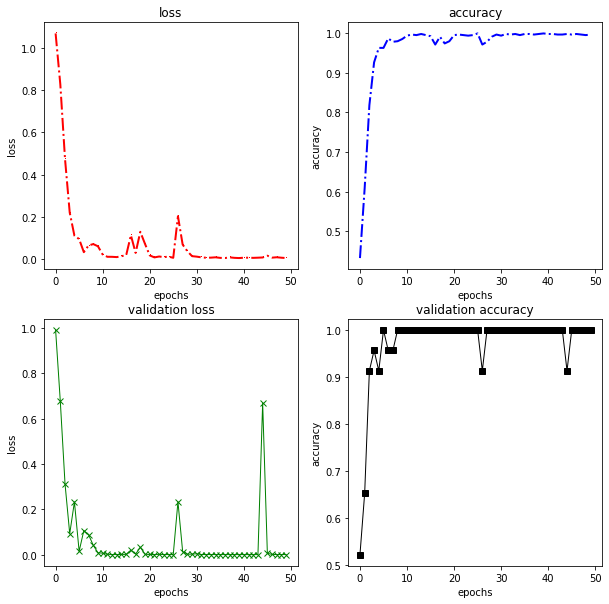

In [ ]:
history_c=hist.history
print('history type:',type(history_c),'\nhistory keys:',history_c.keys())
loss=history_c['loss']
accuracy=history_c['acc']
validation_loss=history_c['val_loss']
validation_acc=history_c['val_acc']
plt.figure(figsize=(10,10),edgecolor='c')
plt.subplot(2,2,1)
plt.plot(loss,',r-.',linewidth=2),plt.title('loss'),plt.xlabel('epochs'),plt.ylabel('loss')
plt.subplot(2,2,2)
plt.plot(accuracy,'b-.',linewidth=2),plt.title('accuracy'),plt.xlabel('epochs'),plt.ylabel('accuracy')
plt.subplot(2,2,3)
plt.plot(validation_loss,'xg-',linewidth=1),plt.title('validation loss'),plt.xlabel('epochs'),plt.ylabel('loss')
plt.subplot(2,2,4)
plt.plot(validation_acc,'sk-',linewidth=1),plt.title('validation accuracy'),plt.xlabel('epochs'),plt.ylabel('accuracy')
#plt.savefig('/content/drive/My Drive/TH/adsdasamCERa.jpg')
plt.show()


In [ ]:
from keras.models import load_model
model=load_model('/content/drive/My Drive/thesis/classification_concat_adam.h5')


In [ ]:
save_path[-15:-4]

'_sgd_concat'

23/23 [==============================] - 1s 33ms/sample - loss: 1.3015e-04 - acc: 1.0000
loss of testdata: 0.00013015410513617098 
accuracy of testdata: 1.0


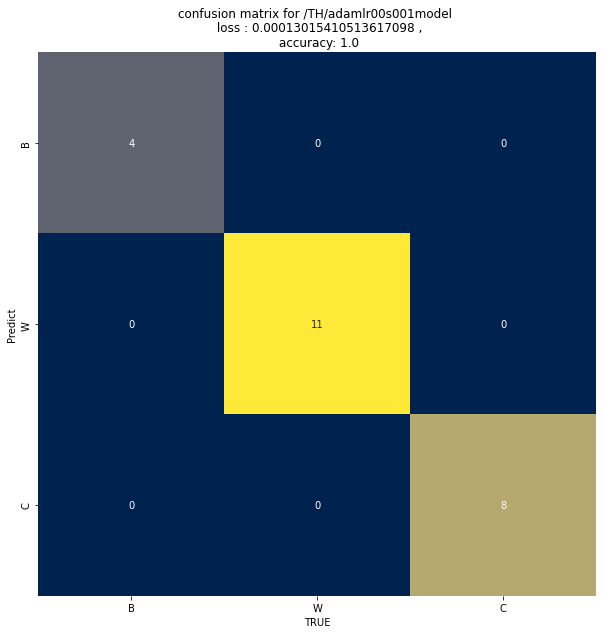

[[ 4  0  0]
 [ 0 11  0]
 [ 0  0  8]]


In [ ]:
model=conv_model
save_path='/content/drive/My Drive/TH/adamlr00s001model.jpg'
test_loss,test_acc=model.evaluate(x_test,y_test)
print('loss of testdata:',test_loss,'\naccuracy of testdata:',test_acc)
y_predict=model.predict(x_test)
y_predict=np.argmax(y_predict,axis=1)
cmat=confusion_matrix(y_predict,ytf)
dataframe=pd.DataFrame(cmat)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dataframe, annot=True,fmt='d', cbar=None, cmap='cividis',ax=ax,xticklabels='BWC',yticklabels='BWC') 
plt.xlabel('TRUE'),plt.ylabel('Predict'),plt.title('confusion matrix for {} \n loss : {} ,\n accuracy: {}'.format(save_path[-25:-4],test_loss,test_acc))
plt.savefig(save_path)
plt.show()
print(cmat)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma'

# MAKE PERCENT OF WEAR 

In [ ]:
class opt_wear:
    import skimage
    def __init__(self,gray_image):
        self.gray_image=gray_image
        
        
        
        
        
    def read(self,path):
        img=cv2.imread(path,0)
        return img
        
        
    def contour_find(self,img,level):
        #gray=skimage.color.rgb2gray(img)
        import matplotlib.image
        import skimage.color
        #img=matplotlib.image.imread(path)
        #grey=skimage.color.rgb2grey(img)
        img_edges=self.edge(img)
        import skimage.measure
        contours=skimage.measure.find_contours(img_edges,level,fully_connected='high',positive_orientation='high')
        contours=np.array(contours)
        return contours
    
    
    
    def contour_show(self,countours):
        fig,ax=plt.subplots()
        ax.imshow(self.gray_image, interpolation='nearest', cmap=plt.cm.gray)
        for n, contour in enumerate(countours):
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            
            
            
    def bad_row(self,contours):
        bad_row=[]
        for i in np.arange(0,len(contours)):
            if len(contours[i]) <=400:
                bad_row.append(i)
        aaa=np.delete(contours,bad_row,axis=0)
        return aaa
    
    
    
    def xy_expand(self,x,y):
        xmin,xmax,ymin,ymax=min(x),max(x),min(y),max(y)
        width=xmax-xmin
        height=ymax-ymin
        cx=(int(width/2)+int(xmin))
        cy=(int(height/2)+int(ymin))
        R=int(width/2)
        return xmin,xmax,ymin,ymax,width,height,cx,cy,R
    
    
    def contour_cv2(self,img_gray):
        ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        show=cv2.drawContours(img_gray, contours, -1, (0,255,0), 3)
        cnt = contours[0]
        return contours,show
    
    
    def area_find(self,contours):
        cnt = contours[0]
        area = cv2.contourArea(cnt)
        return area
    def contour_xy(self,contour,N):
        n=contour.shape
        xxx=[]
        yyy=[]
        for i in np.arange(0,len(contour[N])):
            a=contour[N][i][1]
            xxx.append(a)
        for i in np.arange(0,len(contour[N])):
            a=contour[N][i][0]
            yyy.append(a) 
        xxx=np.array(xxx)
        yyy=np.array(yyy)
        return xxx,yyy
    
    

    #   
    def find_wear(self,idd,level):
        '''
        _
        +
        _
        =
        find wear of cutter 
        '''
        from scipy.signal import convolve2d

        #--------------------------------------------
        #-----------------------------PREPROCESSING--
        #--------------------------------------------
        #------------READ--------------------------------
        gray=self.gray_image
        ho,wo=gray.shape
        Hx = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
        Hy = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype=np.float32)
        Gx = convolve2d(gray, Hx)
        Gy = convolve2d(gray, Hy)
        G = np.sqrt(Gx*Gx + Gy*Gy)
        G=cv2.resize(G,(wo,ho))
        SHARPY = np.array([[-1, -1, -1],
                        [-1, 20, -1],
                        [-1, -1, -1]])
        sharp=cv2.filter2D(gray,-1,SHARPY)
        #-----------------------------SATART CONTOUR-----
        #------------------------------------------------
        oimage=G
        org_counter=self.contour_find(gray,level)      #FIND CONTOURS WITH SKIMAGE
        org_counter=self.bad_row(org_counter)        # REMOVE BAD ROWS FROM CONTOURS 
        number_of_instance=org_counter.shape[0]
        
        xx,yy=self.contour_xy(org_counter,idd)       #GET X & Y FROM CONTOUR
        xmino,xmaxo,ymino,ymaxo,widtho,heighto,cxo,cyo,Ro=self.xy_expand(xx,yy)
        #------------DRAW--------------------------------
        #--------------------&---------------------------
        #-----------------------SAVE---------------------
        plt.figure()
        base = plt.gca().transData
        rot = transforms.Affine2D().rotate_deg(180)
        a=plt.plot(-xx,yy,'r-',linewidth=10,transform= rot + base),plt.title('{}'.format(level)),plt.axis('off')
        plt.savefig('plot.jpg')
        
        contour_image=cv2.imread('plot.jpg',0)
        contour_image=cv2.resize(contour_image,(int(widtho*0.88),int(heighto*0.88)))                 # * * * * * * * 
        hc,wc=contour_image.shape

        # find_contour OF contour_image
        contour_image_contour=self.contour_find(contour_image,0.1)
        # get data from contour OF contour_image
        x,y=self.contour_xy(contour_image_contour,0)
        xmin,xmax,ymin,ymax,width,height,cx,cy,R=self.xy_expand(x,y)

        contours,draw_contour_org=self.contour_cv2(contour_image)
        area=self.area_find(contours)
        #sh(draw_contour_org)
        #ee=cv2.circle(qq,(cx,cy),radius=R,color=(0,0,255))
        #------------DRAW--------------------------------
        #--------------------a---------------------------
        #-----------------------circle---------------------
        circle=(np.zeros((ho,wo),dtype='float32'))
        circle=cv2.resize(circle,(wo,ho))
        circle=cv2.circle(circle,(cxo,cyo),radius=Ro,color=(255,100,255),thickness=12,lineType=cv2.LINE_AA)
        circle=circle.astype(np.uint8)
        circle_contours,show_circle=self.contour_cv2(circle)
        intact_area=self.area_find(circle_contours)
        percent_of_wear=area/intact_area
        #--------------------------------------------
        #======================show====
        #--------------------------------------------
        #contour_show(oimage,org_counter)          # SHOW CONTOUR 

        #--------------------------------------------
        #======================print informations====
        #--------------------------------------------

        #print('xmin {} \nxmax {} \nymin {} \nymax {} \n'.format(xmin,xmax,ymin,ymax))                                   
        #print('width {} \nheight {} \nR {} \ncenter {}  \nintact_area: {} '.format(width,height,
         #                                                                   R,(cx,cy),intact_area))
        #print('percent_of_wear: ',percent_of_wear)
        return intact_area,  area   ,percent_of_wear,show_circle   ,draw_contour_org,    number_of_instance  
    
    
    def num_instance(self,contours):
        N=contours.shape
        return N
    
    def level(self):
        n_ins=[]
        for i in np.arange(1,100):
            level_contourfind=0.003*i
            a=self.contour_find(self.gray_image,level_contourfind)
            b=self.bad_row(a)
            c=self.num_instance(b)
            if c[0] > 0:
                n_ins.append([c,level_contourfind])
        n_ins=np.array(n_ins)        
        return n_ins 
    def best_value(self):
        a=self.level()
        value=[]
        for i in np.arange(0,len(a)):
            b=a[:,0][i][0]-1
            c=a[:,1][i]
            value.append([b,c])
        value=np.array(value)
        percent_value=[]
        for i in np.arange(0,len(a)):
            intact_area,  area   ,percent_of_wear,show_circle   ,draw_contour_org,    number_of_instance =x.find_wear(int(a[:,1][i]),a[:,1][i])
            percent_value100=percent_of_wear*100
            percent_value100=np.asarray(percent_value100,dtype='int16')
            if percent_value100 < 100 :
                percent_value.append(percent_of_wear)
            #print('percent_of_wear={}|instance num={}|level={}'.format(percent_of_wear,int(level[:,1][i]),level[:,1][i]))
        

        return percent_value

    def filtering(self,img,kx,lt):
        img=np.asarray(img,dtype=np.float)
        img=img*kx+lt
        img[img>255]=255
        img[img<0]=0
        return img
    def edge(self,gray):
      Hx = np.array([[2,1,0,-1,-2],
                       [2,1,0,-1,-2],
                       [4,2,0,-2,-4],
                       [2,1,0,-1,-2],
                       [2,1,0,-1,-2]],dtype=np.float32)
        
        
      Hy = np.array([[2,2,4,2,2],
                       [1,1,2,1,1],
                       [0,0,0,0,0],
                       [-1,-1,-2,-1,-1],
                       [-2,-2,-4,-2,-2]],dtype=np.float32)
      Gx = convolve2d(gray, Hx)
      Gy = convolve2d(gray, Hy)
      G = np.sqrt(Gx*Gx + Gy*Gy)
      GG=self.filtering(G,.02,5)
      return GG

In [ ]:
cutter1=cv2.cvtColor(cutter1,cv2.COLOR_RGB2GRAY)
cutter1.shape

(81, 75)

NameError: ignored

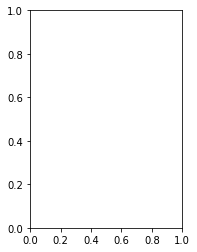

In [ ]:
cutter1.shape
from scipy.signal import convolve2d

#b=skimage.filters.sobel(cutter1)
x=opt_wear(cutter1)
a=x.edge(cutter1)
aa=x.filtering(a,5,50)

plt.subplot(1,2,2),sh(a)
plt.subplot(1,2,1),sh(aa)


In [ ]:
path='d:/Path/pwc/104.jpg'
x=opt_wear(cutter1)
c=x.contour_find(cutter1,.1)
c=x.bad_row(c)
x.contour_show(c)
#intact_area,  area   ,percent_of_wear,show_circle   ,draw_contour_org,    number_of_instance =x.find_wear(0,0.0099)
#x.level()
x.num_instance(c)
best=x.best_value()
besta=np.mean(best)-0.05


In [ ]:
# ===========================
# show mask of dataset with org image
# ---------------------------
import matplotlib.pyplot as plt
sh=plt.imshow
idd=150
plt.subplot(1,2,1),sh(train_set.load_mask(idd)[0][:,:,0])
plt.subplot(1,2,2),sh(train_set.load_image(idd))